In [2]:
import csv
import numpy as np
import matplotlib.pyplot as p
import math
import os
from os import walk
import scipy.io as sio

#folder = r'C:\Users\zomege\Documents\Machine Learning\Matlab\Training_Data_(Line_06)\\'

In [3]:
#Header of csv
#Date[0],Time[1],Depth of Airgun(m)[2],Depth of Reciever(m)[3],X Airgun[4],Y Airgun[5],Z Airgun[6],X_R1[7],Y_R1[8],Z_R1[9],SEL[10],RMS[11]
#Python array
#Depth of Airgun(m)[0],Depth of Reciever(m)[1],Range(m)[2],SEL[3],RMS[4]
#shape of data: ()
#saveLoc = r'C:\Users\zomege\Documents\Machine Learning\data.mat'
saveLoc = r'/home/zomege/Desktop/machinelearninguw-master/data.mat'
if(not(os.path.isfile(saveLoc))):
    files = os.listdir(folder)
    length = len(files)
    data = np.zeros([length,636,5])
    f = 0#file index
    for filename in files:
        e = 0#hydrophone index
        dirname = folder+filename
        #print(dirname)
        if filename.endswith(".csv"): 
            with open(dirname) as csvFile:
                csvReader = csv.reader(csvFile)
                next(csvReader,None)#Skip header
                for row in csvReader:
                    range1 = math.sqrt((float(row[7])-float(row[4]))**2+(float(row[8])-float(row[5]))**2)#range = dist([X_R1,Y_R1],[X_Airgun,Y_airgun])
                    data[f,e] = [row[2],row[3],range1,row[10],row[11]]
                    e = e + 1
        f = f + 1 
    sio.savemat(saveLoc, mdict={'data': data})
else:
    save = sio.loadmat(saveLoc)
    data = save['data']

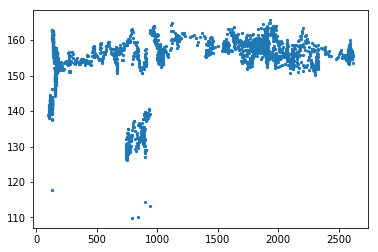

In [4]:
#SEL Plot
# gun depth data[:][200][0]
# SEL data[:][200][3]
xs = data[:,300,0]
ys = data[:,300,3]

p.scatter(xs,ys,s=5)
p.show()

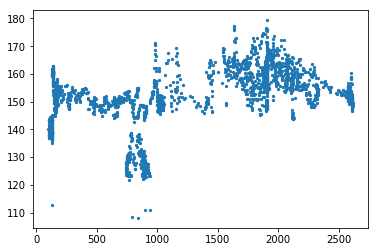

In [51]:
#RMS Plot
xr = data[:,200,0]
yr = data[:,200,4]

p.scatter(xr,yr,s=5)
p.show()

(2361,)


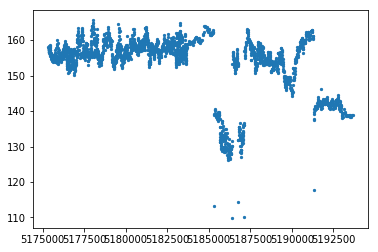

In [13]:
#SEL vs Range
ranges = data[:,200,2]
print(ranges.shape)
p.scatter(ranges,ys,s=5)

#p.hist(ranges)
p.show()

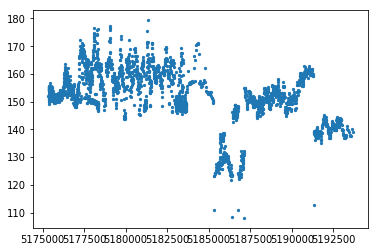

In [53]:
#RMS vs Range
ranges = data[:,200,2]

p.scatter(ranges,yr,s=5)
p.show()

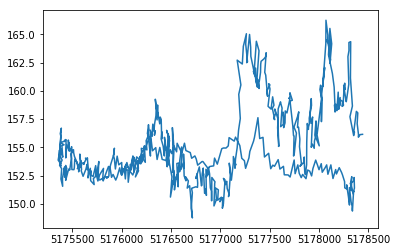

In [47]:
#SEL vs Range
ranges = np.transpose(data[:,200,2])

p.plot(ranges[0:635],ys[0:635])
p.plot(ranges[230*635:231*635],ys[230*635:231*635])
p.plot(ranges[460*635:461*635],ys[460*635:461*635])
p.plot(ranges[690*635:691*635],ys[690*635:691*635])

p.show()